In [11]:
import pandas as pd
import numpy as np
import time
import statistics

In [12]:
v1 = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
out_and = [0, 0, 0, 1]
out_or = [0, 1, 1, 1]

In [13]:
# FOR OR
number_of_tests = 30
alpha = 10**-2

delta_w0 = 0
delta_w1 = 0
delta_w2 = 0
np.random.seed(int(time.time()))
w0 = np.random.uniform(0, 0.01)
w1 = np.random.uniform(0, 0.01)
w2 = np.random.uniform(0, 0.01)
right = False
test_epochs_results = []
for test in range(number_of_tests):
        
    for i in range(0, 20):
        print(f"epoch {i}")
        right_count = 0
        for dataix_, datapoint in enumerate(v1):

            output = w0 + w1 * datapoint[0] + w2 * datapoint[1]
            if(output > 0):
                output = 1
            else:
                output = 0

            error = out_or[dataix_] - output
            delta_w0 = delta_w0 + alpha * error
            delta_w1 = delta_w1 + alpha * datapoint[0] * error
            delta_w2 = delta_w2 + alpha *datapoint[1] * error

            w0 = w0 + delta_w0
            w1 = w1 + delta_w1
            w2 = w2 + delta_w2

            right = error == 0
            if(right):
                right_count += 1
                if(right_count == 4):
                    print("epochs untill convergence " + str(i))
                    test_epochs_results.append(i)
                    
                    # raise Exception("Converged")


epoch 0
epochs untill convergence 0
epoch 1
epochs untill convergence 1
epoch 2
epochs untill convergence 2
epoch 3
epochs untill convergence 3
epoch 4
epochs untill convergence 4
epoch 5
epochs untill convergence 5
epoch 6
epochs untill convergence 6
epoch 7
epochs untill convergence 7
epoch 8
epochs untill convergence 8
epoch 9
epochs untill convergence 9
epoch 10
epochs untill convergence 10
epoch 11
epochs untill convergence 11
epoch 12
epochs untill convergence 12
epoch 13
epochs untill convergence 13
epoch 14
epochs untill convergence 14
epoch 15
epochs untill convergence 15
epoch 16
epochs untill convergence 16
epoch 17
epochs untill convergence 17
epoch 18
epochs untill convergence 18
epoch 19
epochs untill convergence 19
epoch 0
epochs untill convergence 0
epoch 1
epochs untill convergence 1
epoch 2
epochs untill convergence 2
epoch 3
epochs untill convergence 3
epoch 4
epochs untill convergence 4
epoch 5
epochs untill convergence 5
epoch 6
epochs untill convergence 6
epoch 7


Mean :9.5
Median :9.5
Standard Deviation :5.771092546647467


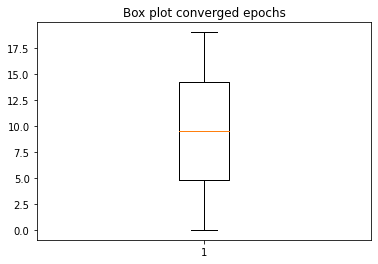

In [14]:
import matplotlib.pyplot as plt


fig1, ax = plt.subplots()

ax.set_title('Box plot converged epochs')


bp = ax.boxplot(test_epochs_results)

print("Mean :" + str(statistics.mean(test_epochs_results)))
print("Median :" + str(statistics.median(test_epochs_results)))
print("Standard Deviation :" + str(statistics.stdev(test_epochs_results)))

plt.show()

   Sepal_length_in_cm  Sepal_width_in_cm  Petal_length_in_cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   Petal_width_in_cm        Class  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  
Best ks: 1
Best accuracy: 97.78%


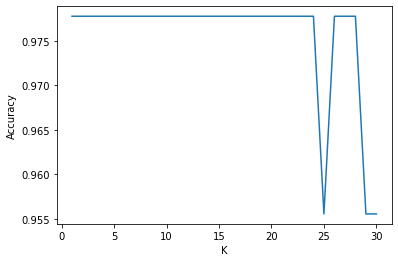

In [19]:
#Exercise 2 k-NN


# 1. Title: Iris Plants Database
# 	Updated Sept 21 by C.Blake - Added discrepency information

# 2. Sources:
#      (a) Creator: R.A. Fisher
#      (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
#      (c) Date: July, 1988

# 3. Past Usage:
#    - Publications: too many to mention!!!  Here are a few.
#    1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
#       Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
#       to Mathematical Statistics" (John Wiley, NY, 1950).
#    2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
#       (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
#    3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
#       Structure and Classification Rule for Recognition in Partially Exposed
#       Environments".  IEEE Transactions on Pattern Analysis and Machine
#       Intelligence, Vol. PAMI-2, No. 1, 67-71.
#       -- Results:
#          -- very low misclassification rates (0% for the setosa class)
#    4. Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE 
#       Transactions on Information Theory, May 1972, 431-433.
#       -- Results:
#          -- very low misclassification rates again
#    5. See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II
#       conceptual clustering system finds 3 classes in the data.

# 4. Relevant Information:
#    --- This is perhaps the best known database to be found in the pattern
#        recognition literature.  Fisher's paper is a classic in the field
#        and is referenced frequently to this day.  (See Duda & Hart, for
#        example.)  The data set contains 3 classes of 50 instances each,
#        where each class refers to a type of iris plant.  One class is
#        linearly separable from the other 2; the latter are NOT linearly
#        separable from each other.
#    --- Predicted attribute: class of iris plant.
#    --- This is an exceedingly simple domain.
#    --- This data differs from the data presented in Fishers article
# 	(identified by Steve Chadwick,  spchadwick@espeedaz.net )
# 	The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa"
# 	where the error is in the fourth feature.
# 	The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa"
# 	where the errors are in the second and third features.  

# 5. Number of Instances: 150 (50 in each of three classes)

# 6. Number of Attributes: 4 numeric, predictive attributes and the class

# 7. Attribute Information:
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
#    5. class: 
#       -- Iris Setosa
#       -- Iris Versicolour
#       -- Iris Virginica

# 8. Missing Attribute Values: None

# Summary Statistics:
# 	         Min  Max   Mean    SD   Class Correlation
#    sepal length: 4.3  7.9   5.84  0.83    0.7826   
#     sepal width: 2.0  4.4   3.05  0.43   -0.4194
#    petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)
#     petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)

# 9. Class Distribution: 33.3% for each of 3 classes.
from sklearn.model_selection import train_test_split
from collections import Counter

df = pd.read_csv("iris.data")
print(df.head())

y = df.iloc[:, 4].values
X = df.iloc[:, 0:4].values

# split the dataset randomly in two subsets (70% / 30%).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, shuffle=True)

# implement k-NN from scratch
ks = 30
ks_vector = [x for x in range(1, ks + 1)]

predictions = {}


for ks in ks_vector:
    predictions[ks] = []
    for i in range(0, len(X_test)):
        distances = []
        for j in range(0, len(X_train)):
            dist = np.sqrt(np.sum(np.square(X_test[i] - X_train[j])))
            distances.append([dist, y_train[j]])
        distances.sort(key=lambda x: x[0])
        votes = []
        for k in range(0, ks):
            votes.append(distances[k][1])
        prediction = Counter(votes).most_common()
        predictions[ks].append({
            "prediction": prediction[0][0],
            "actual": y_test[i],
        })



def calculate_accuracy(predictions):
    correct = 0
    for i in range(0, len(predictions)):
        if predictions[i]["prediction"] == predictions[i]["actual"]:
            correct += 1
    return correct / len(predictions)

#plot accuract over ks vector
best_accuracy = 0
best_ks = 0
accuracy_vector = []
for ks in ks_vector:
    accuracy = calculate_accuracy(predictions[ks])
    if(accuracy > best_accuracy):
        best_accuracy = accuracy
        best_ks = ks
    accuracy_vector.append(accuracy)

print("Best ks: " + str(best_ks))
print("Best accuracy: " + str(round(best_accuracy*100, 2)) + "%")
plt.plot(ks_vector, accuracy_vector)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()
#O melhor intervalo de k é 5 e 20 que conseguimos alcançar com a acurácia de 0.96

In [20]:

# 3
import math

# Using the dataset from the previous exercise, split the dataset in two, according to the val-
# ues of the first column (all examples where this column’s value is larger than the column’s
# average to one subset and all examples where the values are smaller to another subset).

df = pd.read_csv("iris.data")
divide_column = df.keys().values[:-1]

for column in divide_column:

    first_column_mean = np.mean(df[column].values)
    df_temp = df.sort_values(by=[column])

    # print(df.head(10))
    df_1 = df_temp[df_temp[column] >= first_column_mean]

    df_2 = df[df[column] < first_column_mean]


    print("df_1: " + str(df_1.shape))
    print("df_2: " + str(df_2.shape))

    # print(df_1.describe())
    # print(df_2.describe())

    # print(df_1.head(10))
    # print(df_1.head(10))

    # print(df_2.head())
    # Use Iris-setosa as your target value (p+ are the examples classified as Iris-setosa and p− the
    # remaining ones) and calculate the entropy of the 3 datasets (the complete dataset, and the
    # two subsets).

    target_value = "Iris-setosa"

    entropy_1 = 0
    entropy_2 = 0

    p_1_plus = len(df_1[df_1[target_value] == target_value]) / len(df_1)
    p_1_minus = 1 - p_1_plus

    p_2_plus = len(df_2[df_2[target_value] == target_value]) / len(df_2)
    p_2_minus = 1 - p_2_plus

    # print(p_2_plus)
    # print(p_1_plus)

    p1_entropy = -(p_1_plus * np.log2(p_1_plus) + p_1_minus * np.log2(p_1_minus))  # entropy of the first dataset
    p2_entropy = -(p_2_plus * np.log2(p_2_plus) + p_2_minus * np.log2(p_2_minus))  # entropy of the second dataset

    if(math.isnan(p1_entropy)):
        p1_entropy = 0
    if(math.isnan(p2_entropy)):
        p2_entropy = 0


    print("Entropy of the first dataset: " + str(p1_entropy))
    print("Entropy of the second dataset: " + str(p2_entropy))

    # Calculate the information gain of the split of S by feature a:

    # g1 = p1_entropy - (p_1_plus * p2_entropy)
    # g2 = p2_entropy - (p_2_plus * p1_entropy)

    gain_1 = p1_entropy - (p_1_plus * p2_entropy) + (p_2_plus * p1_entropy)
    gain_2 = p2_entropy - (p_2_plus * p1_entropy) + (p_1_plus * p2_entropy)

    print("Gain of the first dataset: " + str(gain_1))
    print("Gain of the second dataset: " + str(gain_2))

    # print("Information gain of the first dataset: " + str(g1))
    # print("Information gain of the second dataset: " + str(g2))




df_1: (70, 5)
df_2: (80, 5)


KeyError: 'Iris-setosa'

In [57]:
from sklearn.model_selection import train_test_split
import math
import statistics
df = pd.read_csv("iris.data")

# y = df.iloc[:, 4].values
# X = df.iloc[:, 0:4].values
# # split the dataset randomly in two subsets (70% / 30%).
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=0, shuffle=True)

# implement a Naive Bayes classifier from scratch.
# 1. separate the class
# 2. summarize dataset
# 3. normal probability density function
# 4. class probability classifier
# 5. Test the classifier on the test data.
# 6. Report the accuracy of the classifier.


def calculateMean(data):
    return sum(data)/len(data)

def calculateStdev(data):
    variance = statistics.variance(data)
    return math.sqrt(variance)


        # print(separated[data_class])

# print(separated)

#summarize class with mean, stdev, len

def summarizeClass(data):
    print(data)
    new_data = {}
    for d in data:

        for subd_ix, sub_d in enumerate(d):
            try:
                new_data[subd_ix].append(sub_d)
            except KeyError:
                new_data[subd_ix] = []
                new_data[subd_ix].append(sub_d)

    summary = {}
    for k in new_data:
        summary[k] = [calculateMean(new_data[k]), calculateStdev(new_data[k]), len(new_data[k])]

    return summary


test_data = df[df["Class"] == "Iris-setosa"].drop("Class", axis= 1).values
print(test_data)
print(summarizeClass(test_data))

separated_summary_by_class = {}

#normal destribution probability
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

for data_class in list(df["Class"].unique()):


    data_class_values = df[df["Class"] == data_class].drop("Class", axis= 1).values
    separated_summary_by_class[data_class] = summarizeClass(data_class_values)
    
print(separated_summary_by_class)




# normal probability function



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1